In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
T_data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/titanic.csv", index_col='Unnamed: 0')
CS_data =  pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML5.3%20categorical%20features/data/Customer_support_data.csv")

In [3]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,491,1,577,7,4,644


In [4]:
T_data.describe(exclude=[np.number])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,491,1,577,7,4,644


<Axes: xlabel='channel_name', ylabel='Count'>

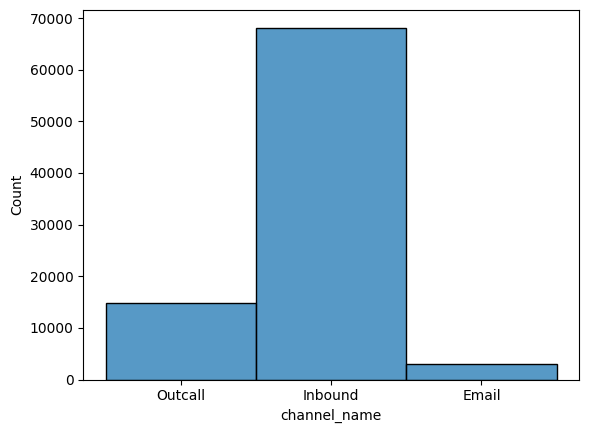

In [5]:
sns.histplot(data=CS_data, x="channel_name")

In [6]:
CS_data.channel_name.value_counts()

channel_name
Inbound    68142
Outcall    14742
Email       3023
Name: count, dtype: int64

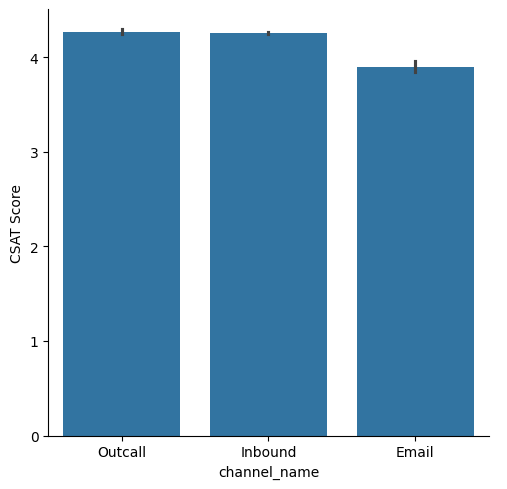

In [7]:
sns.catplot(data=CS_data, x="channel_name", y="CSAT Score", kind="bar")

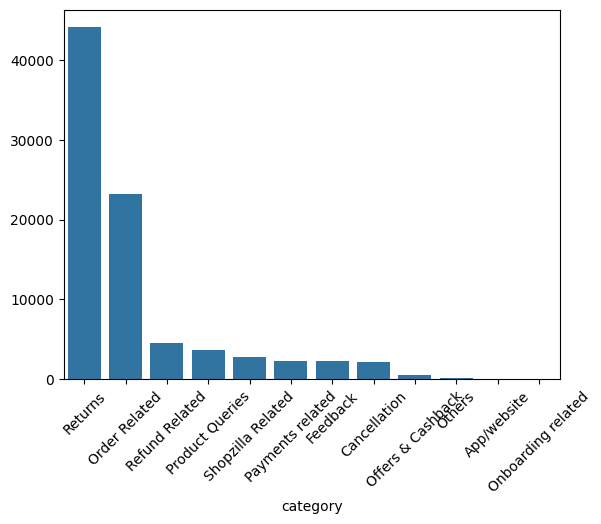

In [8]:
counts = CS_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

In [11]:
CS_data["Customer Remarks New"] = (CS_data["Customer Remarks"].str.len() > 3).astype(int)
CS_data["Is_order"] = (CS_data["Order_id"].isna()).astype(int)

CS_data.loc[~CS_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

CS_data['Agent_count'] = CS_data.groupby(["Agent_name"])["Agent_name"].transform('count')


CS_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})


CS_data['Sups_no_agents'] = CS_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

CS_data['Product_category'] = CS_data['Product_category'].fillna('unknown')

CS_data['connected_handling_time'] = CS_data['connected_handling_time'].fillna('0')

from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
T_data.Sex = LE_sex.fit_transform(T_data.Sex)

T_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(T_data[['Embarked']])

OH_embarked.get_feature_names_out(['Embarked'])

dummies = pd.DataFrame(OH_embarked.fit_transform(T_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = T_data.index)


T_dummies = pd.concat([T_data, dummies]).drop(["Embarked"], axis=1)

CS_dropped = CS_data.drop([
    "Unique id",
    "Sub-category",
    "Customer Remarks",
    "Customer_City",
    "Agent_name",
    "Supervisor",
    "Order_id",
    "order_date_time",
    "Issue_reported at",
    "issue_responded",
    "Survey_response_Date",
    "Item_price",
    ], axis=1)

CS_dummies = pd.get_dummies(CS_dropped)
CS_dropped

,channel_name,category,Product_category,connected_handling_time,Manager,Tenure Bucket,Agent Shift,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents
0,Outcall,Product Queries,unknown,0,Jennifer Nguyen,On Job Training,Morning,5,0,0,42,41
1,Outcall,Product Queries,unknown,0,Michael Lee,>90,Morning,5,0,0,32,17
2,Inbound,Order Related,unknown,0,William Kim,On Job Training,Evening,5,0,0,35,46
3,Inbound,Returns,unknown,0,John Smith,>90,Evening,5,0,0,48,28
4,Inbound,Cancellation,unknown,0,Michael Lee,0-30,Morning,5,0,0,124,29
...,...,...,...,...,...,...,...,...,...,...,...,...
85902,Inbound,Refund Related,unknown,0,William Kim,On Job Training,Morning,4,0,0,128,31
85903,Inbound,Order Related,unknown,0,Emily Chen,>90,Morning,5,1,0,75,50
85904,Inbound,Order Related,unknown,0,Olivia Tan,On Job Training,Evening,5,1,0,31,41
85905,Inbound,Feedback,unknown,0,Olivia Tan,>90,Morning,4,0,0,48,44


# 1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.

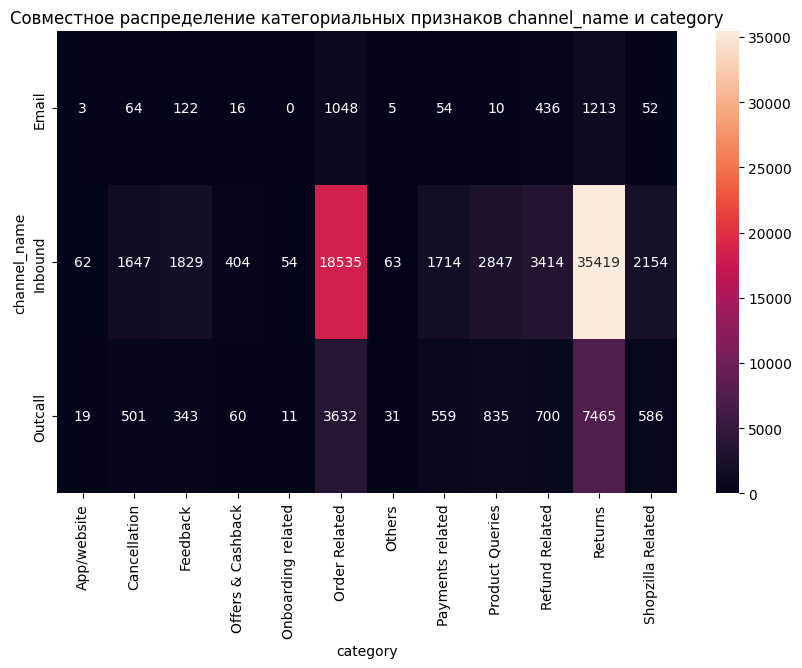

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(CS_dropped['channel_name'], CS_dropped['category']), annot=True, cmap='rocket', fmt='d')
plt.title('Совместное распределение категориальных признаков channel_name и category')
plt.show()

<Axes: ylabel='Count'>

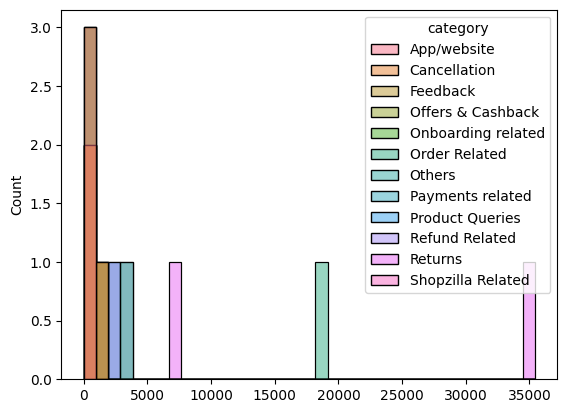

In [19]:
sns.histplot(pd.crosstab(CS_dropped['channel_name'], CS_dropped['category']))

Вывод:

Входящие звонки были по поводу заказов или возвратов в большинстве случаев, это же касается почты и исходящих звонков. Кроме того, можно сказать, что по поводу заказов или возвратов люди чаще звонят, чем пишут на почту.

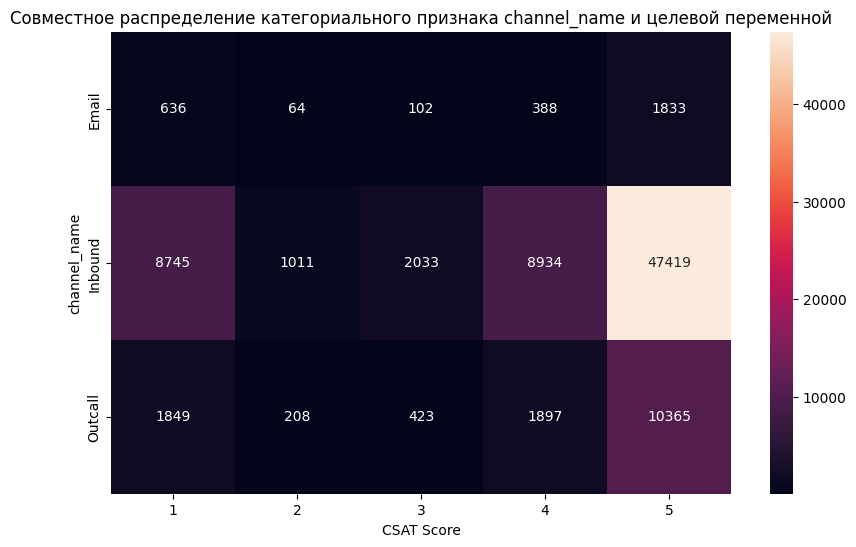

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(CS_dropped['channel_name'], CS_dropped['CSAT Score']), annot=True, cmap='rocket', fmt='d')
plt.title('Совместное распределение категориального признака channel_name и целевой переменной')
plt.show()

<Axes: ylabel='Count'>

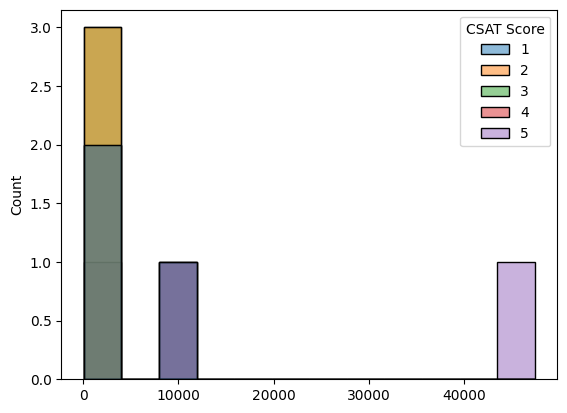

In [22]:
sns.histplot(pd.crosstab(CS_dropped['channel_name'], CS_dropped['CSAT Score']))

Вывод:

Большее число отзывов положительны с баллом 5 и поступают по входящим вызовам.

# 2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = CS_dummies.drop('CSAT Score', axis=1)
y = CS_dummies['CSAT Score']

model = DecisionTreeClassifier(random_state=42)

model.fit(X, y)

feature_importances = model.feature_importances_
feature_names = X.columns

sorted_importances = sorted(zip(feature_importances, feature_names), reverse=True)

i = 0
print("Важность признаков:")
for importance, feature in sorted_importances:
    print(f"{feature}: {importance:.4f}")
    i +=1
    if i == 10:
      break

Важность признаков:
Agent_count: 0.2991
Sups_no_agents: 0.1637
Is_order: 0.0657
channel_name_Inbound: 0.0398
channel_name_Outcall: 0.0370
category_Order Related: 0.0195
category_Refund Related: 0.0192
Agent Shift_Morning: 0.0187
Agent Shift_Evening: 0.0173
channel_name_Email: 0.0165


# 3. Разбейте датасет на тестовую и обучающую выборки

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(CS_dummies.drop('CSAT Score', axis=1), CS_dummies['CSAT Score'], test_size=0.33, random_state=42)

X_train.shape[0], X_test.shape[0]

(57557, 28350)

# 4. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.

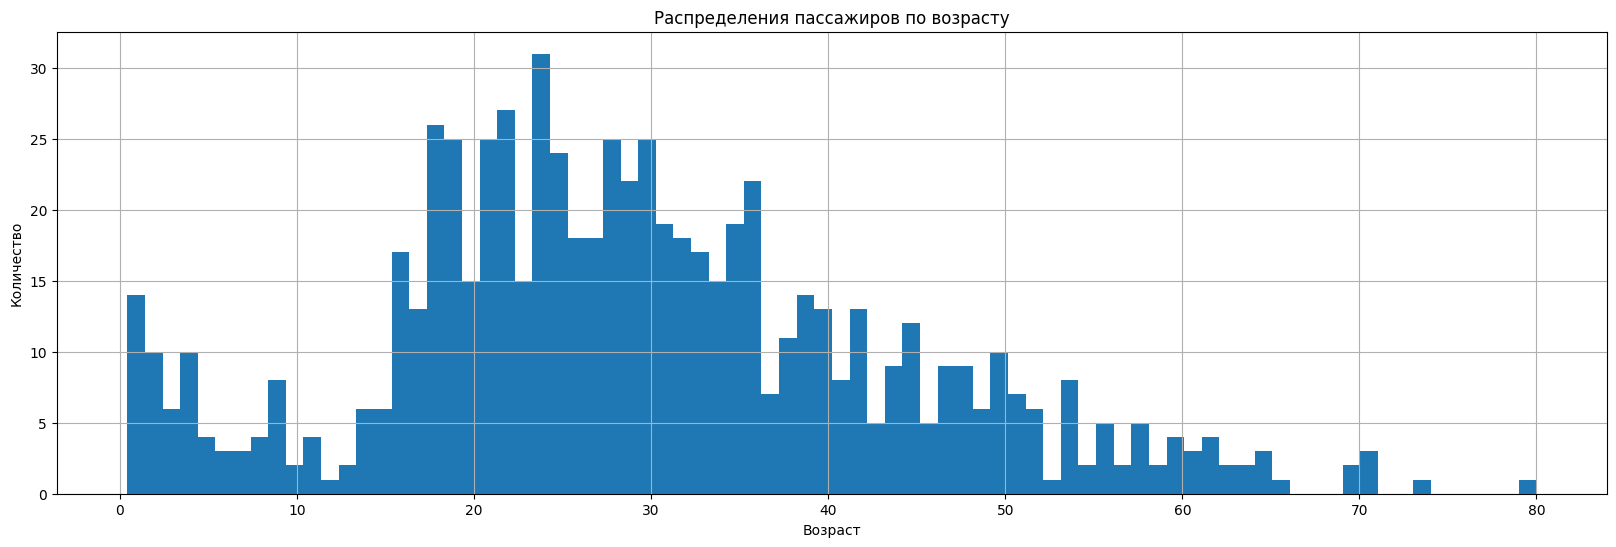

In [29]:
def custom_hist(T_data, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(T_data, T_data.max().astype(int) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


custom_hist(T_data["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

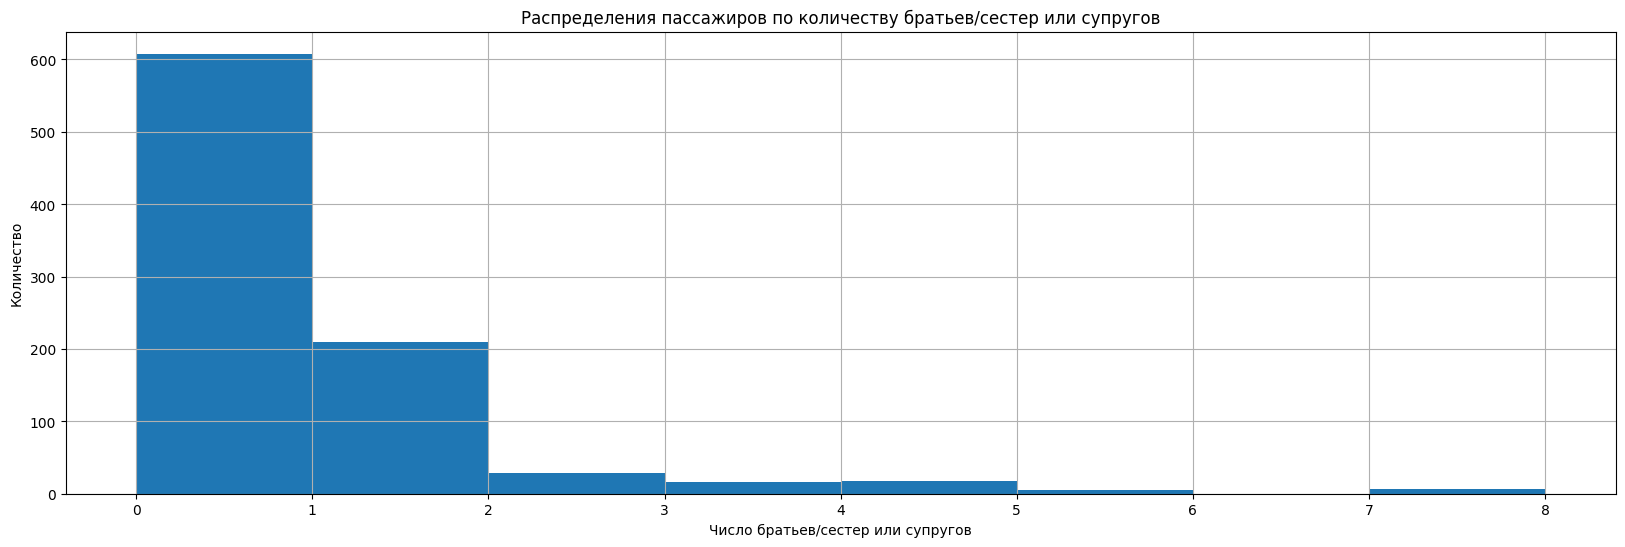

In [30]:
custom_hist(T_data["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов',
  'Число братьев/сестер или супругов')

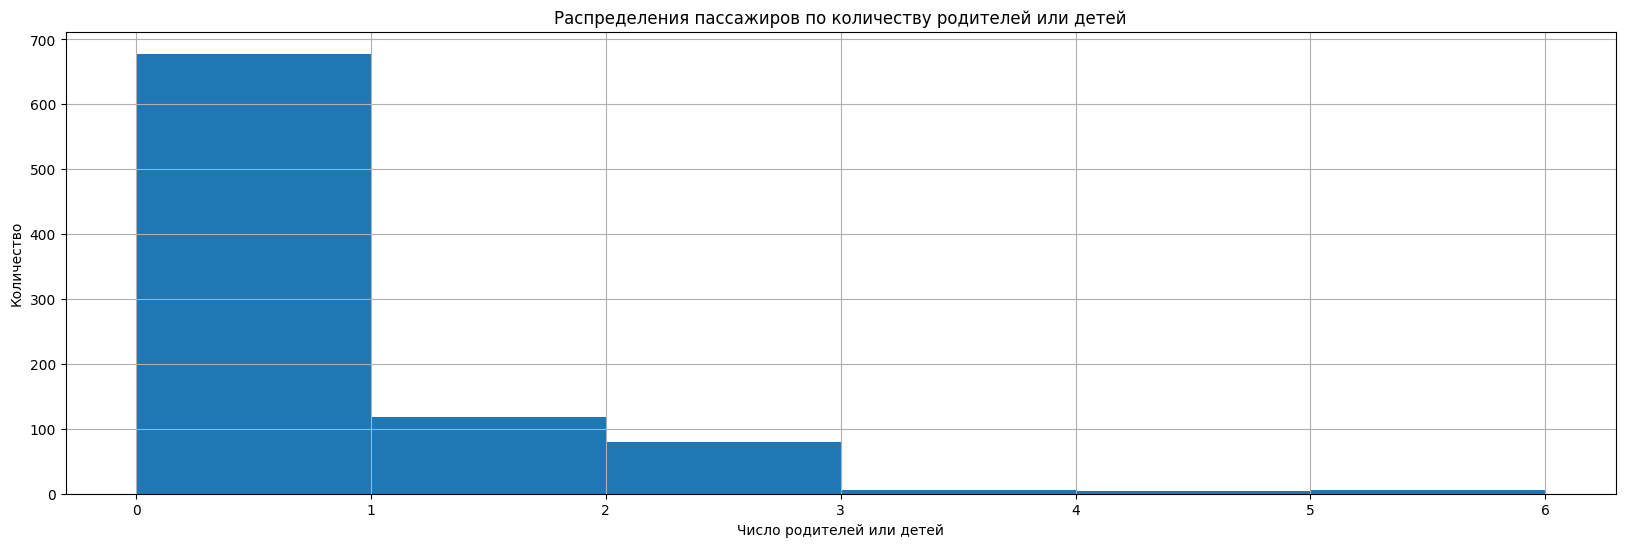

In [31]:
custom_hist(T_data["Parch"], 'Распределения пассажиров по количеству родителей или детей',
  'Число родителей или детей')

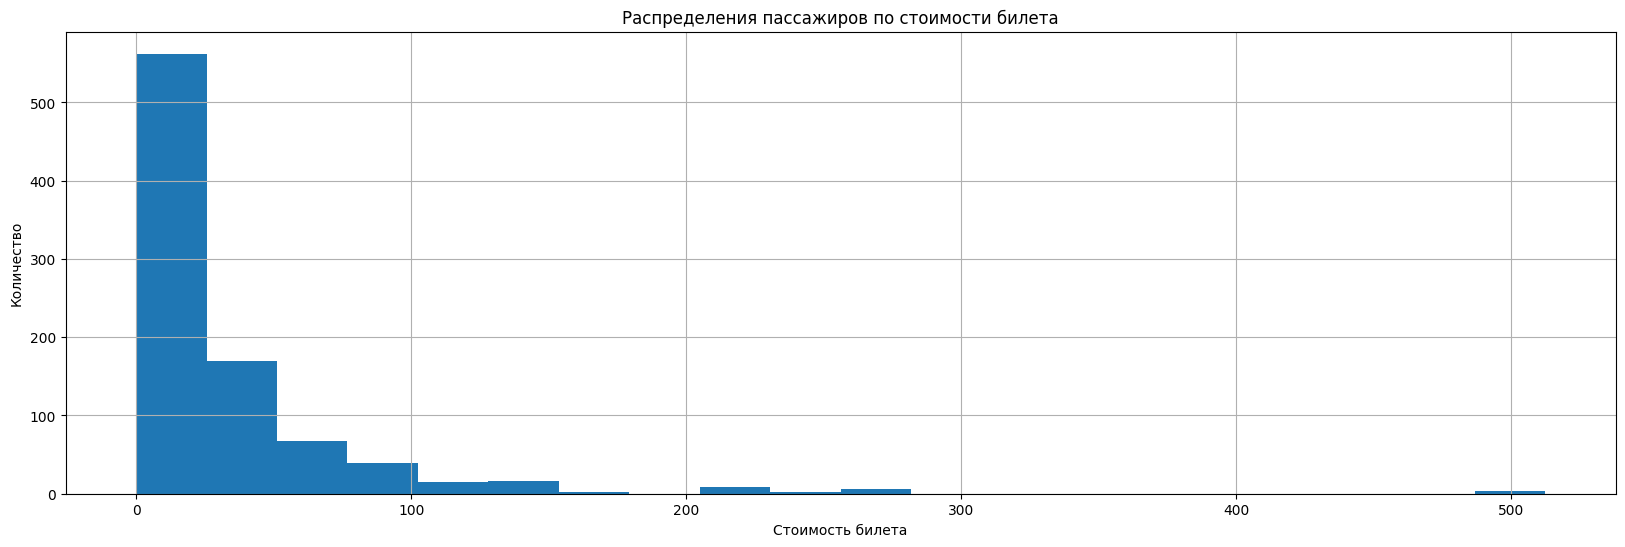

In [32]:
custom_hist(T_data["Fare"], 'Распределения пассажиров по стоимости билета',
  'Стоимость билета', bins=20)

<Axes: ylabel='Frequency'>

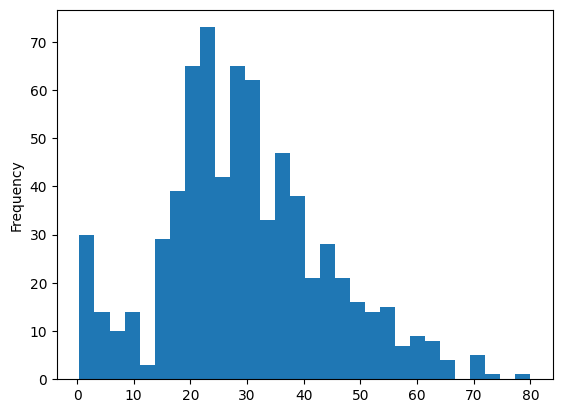

In [33]:
T_data['Age'].plot.hist(bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

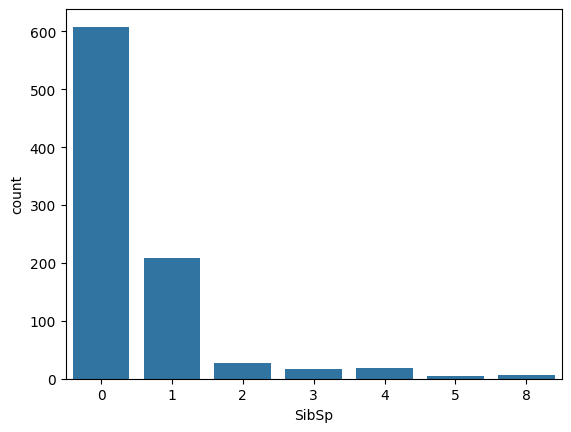

In [34]:
sns.countplot(x='SibSp', data=T_data)

<Axes: >

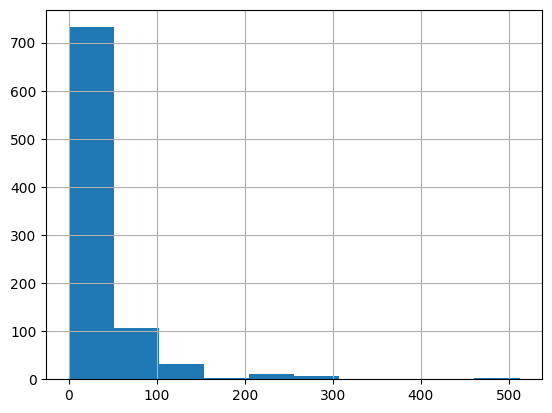

In [35]:
T_data['Fare'].hist()

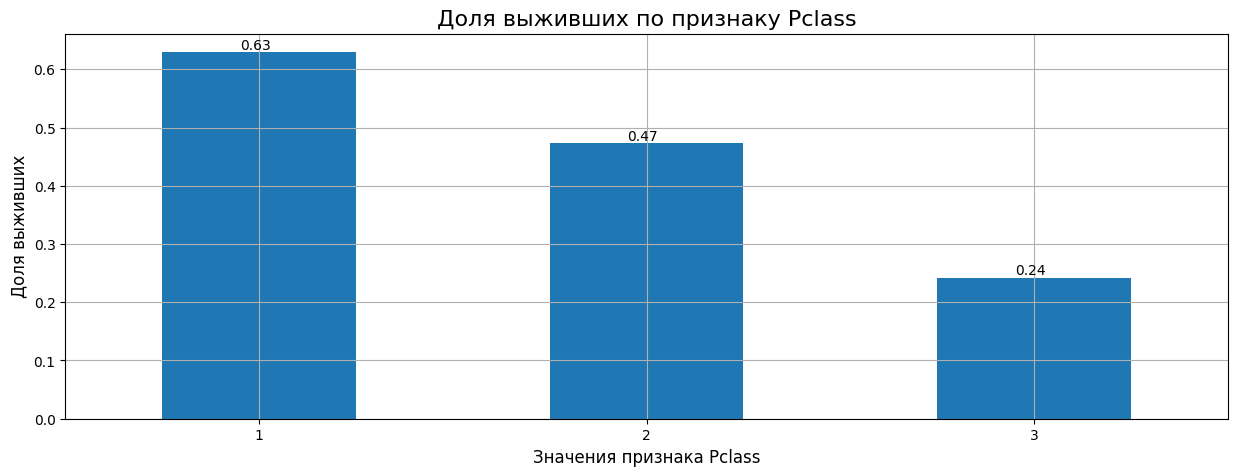

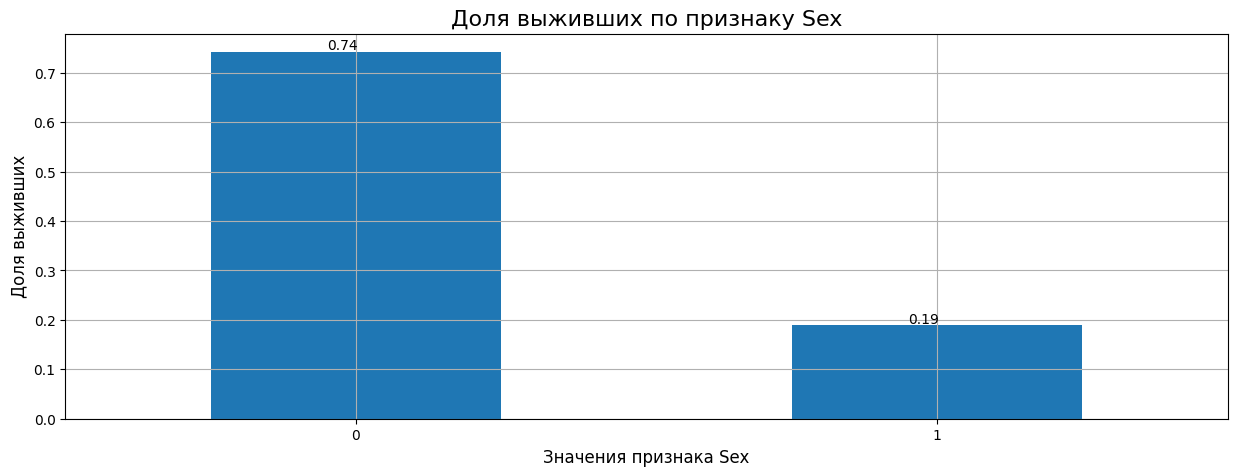

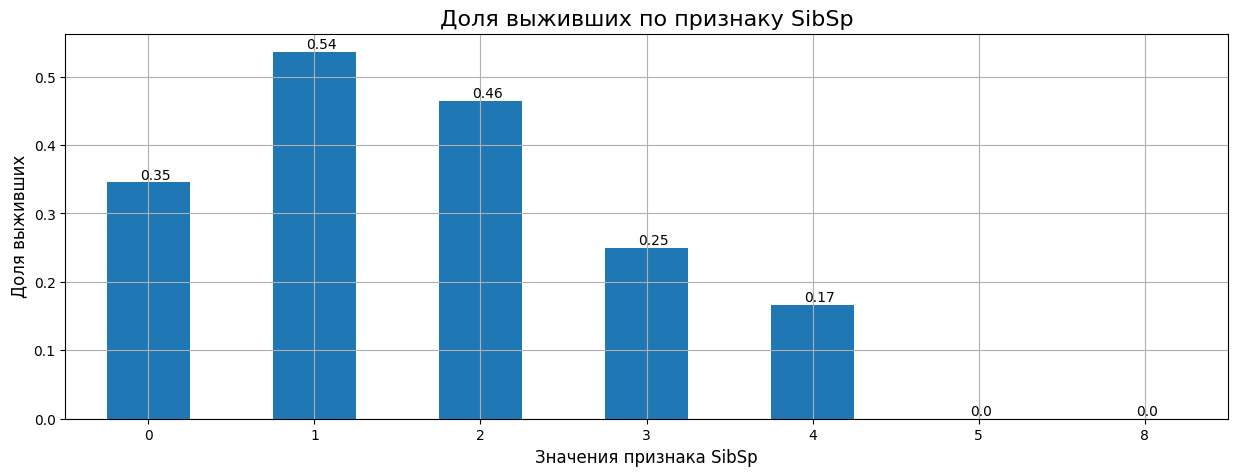

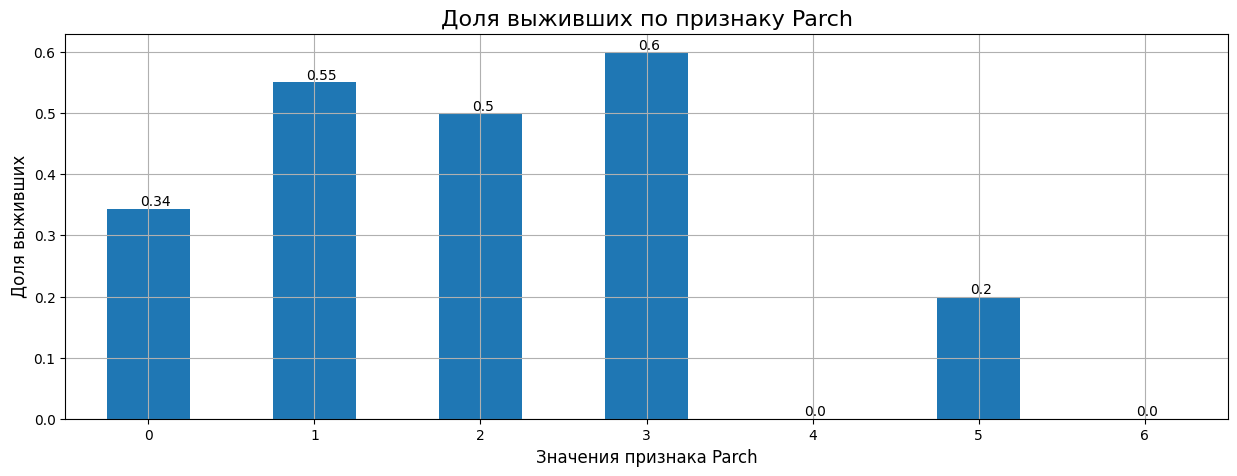

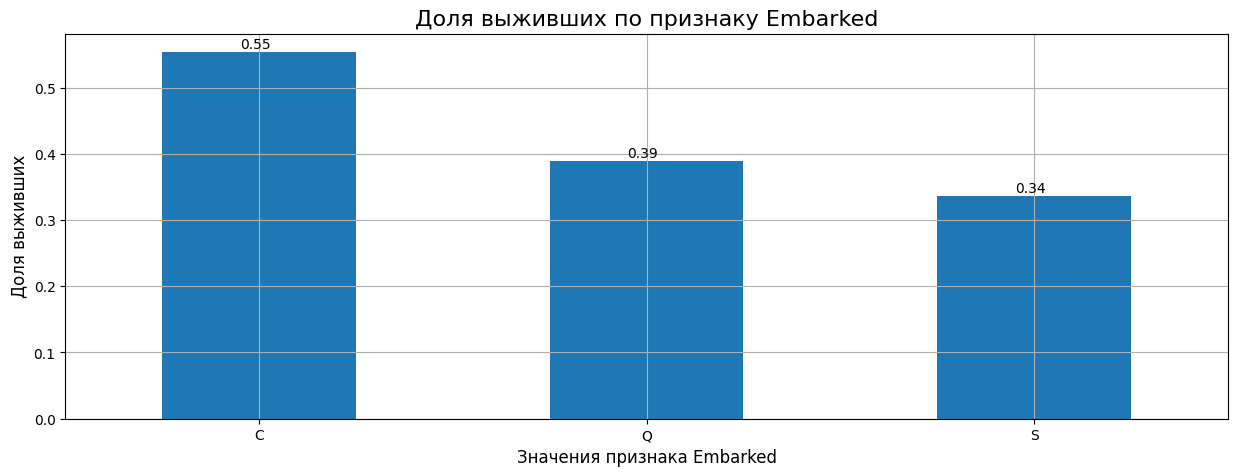

In [36]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = T_data.pivot_table(index=column, values='Survived', aggfunc='mean')

    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})

    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))

    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax)
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()
